In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

## K Nearest Neighbours (KNN)
**General Idea:**    
It simply classifies objects based on **feature similarity**: Find k individuals in our data “most similar” to the new individual in terms of predictor values;  

For classification, use voting.  
For regression, use averaging or weighted averaging of target values of these k individuals to predict target for our new individual.  

**Inference Algorithms**  
Given an unclassified data,
1.  **Measure** the distance (Euclidian, Manhattan, Minkowski or Weighted) from the new data to all others data that is already classified: 

2. Sort individuals from smallest $d_i$ to largest, where $d_i$ be the distance of our new individual from the $i$-th individual in our training data
     + **Gets** the K(K is a parameter that you define) smaller distances (or their indices)
    
3. Use the labels for the individuals with smallest $d_i$ to predict the label, i.e., $\hat{y}$ = f(y(1),...,y(k))
     + If we denote the targets in the sorted list by y(1); : : : ; y(n), then y(1) is observed target for closest individua while y(n) is observed target for furthest individual
     
     + Check the list of classes had the shortest distance and **count** the amount of each class that appears;
     + **Takes** as correct class with the class that appeared the most times;





In [31]:
# This is a very easy algorithm. Let's implement it.
k = 5
y_pred = []
for test_data in X_test:
    distances = []
    for x in X_train:
        dist = np.sqrt(np.sum((test_data - x)**2))
        distances.append(dist)

    top_k_indices = np.argsort(np.array(distances))[:k]
    # print(y_train[top_k_indices])
    prediction = np.argmax(np.bincount(y_train[top_k_indices]))
    y_pred.append(prediction)
   
print(np.sum(y_pred == y_test) / len(y_test))

0.975925925925926


In [32]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(np.sum(y_test == y_pred) / len(y_test))

0.975925925925926


**How to choose k?**  
The training error rate and the validation error rate are two parameters to access on different K-value.

**How to choose parameters?**  
Use leave-one-out cross-validation
For each combination of parameter choices:
1. Predict each example $y_{i}$ using $k-\mathrm{NN}$
2. Accumulate error in predicting $y_{i}$  

Choose the parameters that minimise this score

In [9]:
# see all distance metrics: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
distance_types = ['euclidean', 'manhattan', 'cityblock', 'chebyshev', 'minkowski', 'cosine']


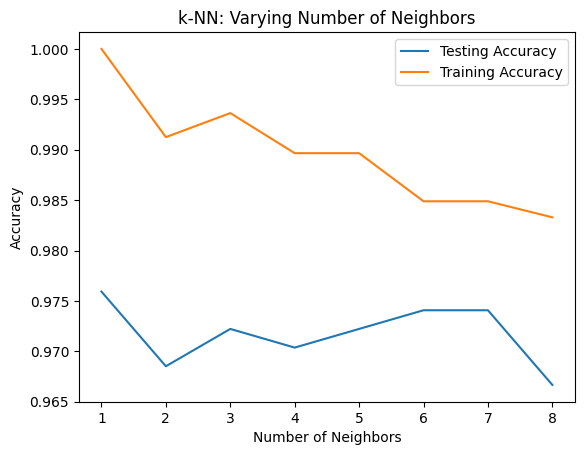

**Advantages**  
* simple to understand and easy to implement.
* Zero to little training time.(k-NNs does not produce a model)
* Works easily with multiclass data sets.
* Has good predictive power.
* Does well in practice.
<!--  -->
* Very weak assumptions about data
* Efficient learning in high dimensions
* Easily handle continuous and categorical variables
* Instance-based intepretation

**Disadvantages**  
* Computationally expensive testing phase.
* Can have skewed class distributions (If a particular class is very frequent during the training phase, it will tend to prevail the majority voting of the new example).
* **Curse of dimensionality**: The accuracy can be decreased when it comes to high-dimension data. The reason is that there is a little difference between the nearest and farthest neighbor.
<!--  -->
* Lots of parameters to tune
    * neighborhood size(How many neighbours ( $k$ ) to use?)
    * Distance function(How to measure "nearest"?)
    * Kernel weighting function(How to average or weight the neighbours)  
    $\hat{y}^{\prime}=\frac{1}{k} \sum_{i=1}^{k} g\left(y^{(i)}\right)$ where $g(d)$ is a function that gets smaller as $d$ gets larger
    * Should all predictors be treated the same?
* Predictor selection is not straightforward
* No general intepretation

